<a href="https://colab.research.google.com/github/OctavioSB11/Projeto-DIO-Transfer-Learning/blob/main/projeto_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [4]:
# Baixar e preparar o dataset
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.50EQJ6_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [5]:
# Função para pré-processamento das imagens
def preprocess(image, label):
    image = tf.image.resize(image, (160, 160)) / 255.0  # Normalização
    return image, label

ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [6]:
# Carregar MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
# Criar a nova cabeça do modelo
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Saída binária: Gato ou Cachorro
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# Treinar o modelo
history = model.fit(ds_train, validation_data=ds_val, epochs=10)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 53s 66ms/step - accuracy: 0.9110 - loss: 0.2091 - val_accuracy: 0.9757 - val_loss: 0.0629
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step - accuracy: 0.9750 - loss: 0.0698 - val_accuracy: 0.9798 - val_loss: 0.0564
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.9796 - loss: 0.0554 - val_accuracy: 0.9794 - val_loss: 0.0547
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9839 - loss: 0.0473 - val_accuracy: 0.9800 - val_loss: 0.0541
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.9865 - loss: 0.0429 - val_accuracy: 0.9794 - val_loss: 0.0541
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9875 - loss: 0.0376 - val_accuracy: 0.9802 - val_loss: 0.0543
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - accuracy: 0.9887 - loss: 0.0353 - val_accuracy: 0.9802 - val_loss: 0.0542
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.9903 - loss: 0.0309 - 

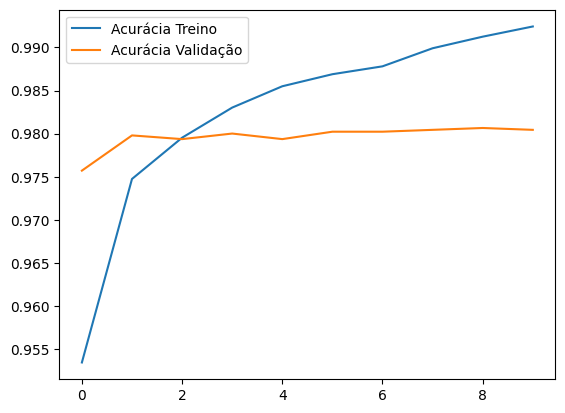

In [9]:
# Avaliação do modelo
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.legend()
plt.show()

In [10]:
# Salvar o modelo treinado
model.save('cats_vs_dogs_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


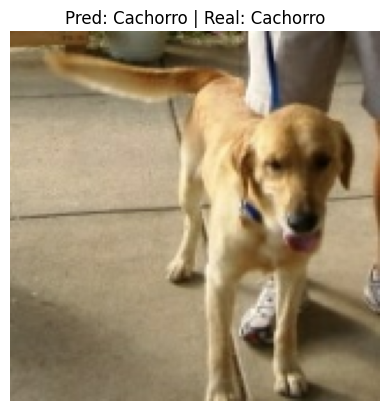

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


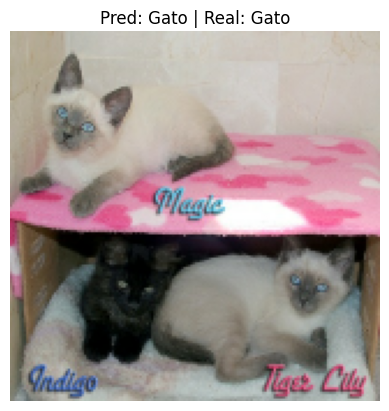

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


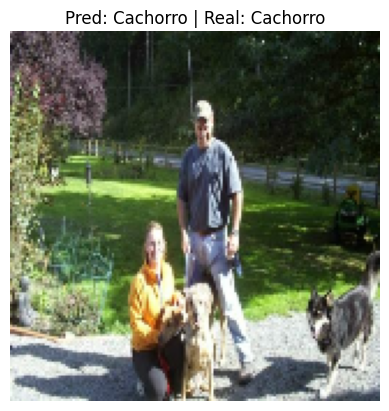

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


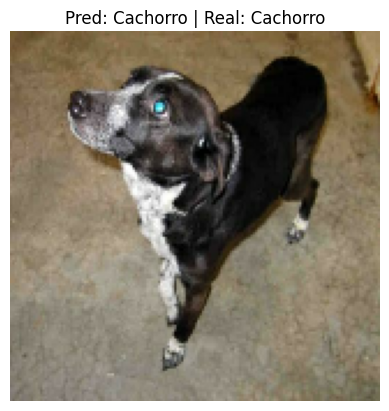

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


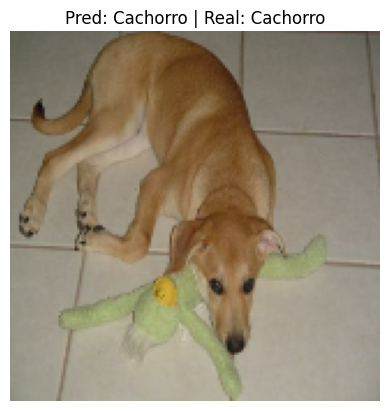

In [12]:
import matplotlib.pyplot as plt

# Obter um lote de imagens do conjunto de validação
sample_batch = ds_val.take(1)  # Pega um batch (lote) do dataset

for images, labels in sample_batch:
    for i in range(5):  # Testar 5 imagens
        img = images[i].numpy()  # Converter para NumPy
        label = labels[i].numpy()  # Obter rótulo real

        # Redimensionar para entrada do modelo
        img_array = np.expand_dims(img, axis=0)

        # Fazer a predição
        prediction = model.predict(img_array)

        # Interpretar o resultado
        predicted_label = "Cachorro" if prediction[0] > 0.5 else "Gato"
        true_label = "Cachorro" if label == 1 else "Gato"

        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Pred: {predicted_label} | Real: {true_label}")
        plt.show()
